<a href="https://colab.research.google.com/github/SaimManzoor49/tensorflow/blob/main/K_Mean(Clustring).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

In [3]:
k = 10
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(x_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [7]:
cluster_centers = kmeans.cluster_centers_

class ClusterCenterLayer(tf.keras.layers.Layer):
    def __init__(self, cluster_centers, **kwargs):
        super(ClusterCenterLayer, self).__init__(**kwargs)
        self.cluster_centers = tf.constant_initializer(cluster_centers)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], k),
                                      initializer=self.cluster_centers,
                                      trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)

# Build the classifier model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28 * 28,)),
    ClusterCenterLayer(cluster_centers),
    tf.keras.layers.Activation('softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.layers[1].set_weights([cluster_centers, np.zeros(k)])


In [8]:
model.fit(x_train_flat, y_train, epochs=10, batch_size=32, validation_data=(x_test_flat, y_test))


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5180 - accuracy: 0.8513 - val_loss: 0.3204 - val_accuracy: 0.9115
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3169 - accuracy: 0.9106 - val_loss: 0.2915 - val_accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.9172 - val_loss: 0.2818 - val_accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9215 - val_loss: 0.2762 - val_accuracy: 0.9247
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2755 - accuracy: 0.9233 - val_loss: 0.2760 - val_accuracy: 0.9230
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2709 - accuracy: 0.9242 - val_loss: 0.2740 - val_accuracy: 0.9252
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2673 - accuracy: 0.9258 - val_loss: 0.2728 - val_accuracy

In [11]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9255
Test accuracy: 0.9254999756813049


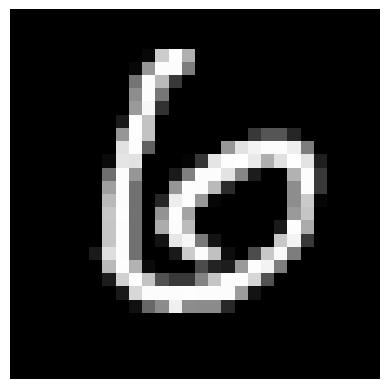

1/1 [==============================] - 0s 37ms/step
Predicted Digit: 6


In [25]:
import matplotlib.pyplot as plt

index = 11

# Display the image
plt.imshow(x_test[index], cmap='gray')
plt.axis('off')
plt.show()

image_flat = x_test[index].reshape(1, 28 * 28) / 255.0
predictions = model.predict(image_flat)

# Get the predicted class (digit)
predicted_class = np.argmax(predictions)
print(f'Predicted Digit: {predicted_class}')
